In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("HIV_dataset_resampled.csv")
print(train.shape)

(704, 10)


In [3]:
train.head(5)

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,3,0,0,1,0,1,1,1,1
1,20,3,0,0,0,1,0,1,0,0
2,23,2,1,0,0,1,0,0,0,0
3,24,2,0,0,1,1,4,1,1,1
4,18,3,1,4,1,0,2,1,1,1


In [4]:
#checking for missing data
NAs = pd.concat([train.isnull().sum()], axis = 1, keys=["Train"])
NAs[NAs.sum(axis=1) > 0]

,Train


In [5]:
#filling missing values with mode
train["Places of seeking sex partners"] = train["Places of seeking sex partners"].fillna(train["Places of seeking sex partners"].mode()[0])

In [6]:
#Getting Dummies(variables that represent categorical data) from all other categorical vars
for col in train.dtypes[train.dtypes == "object"].index:
    for_dummy = train.pop(col)
    train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)
train.head()

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,3,0,0,1,0,1,1,1,1
1,20,3,0,0,0,1,0,1,0,0
2,23,2,1,0,0,1,0,0,0,0
3,24,2,0,0,1,1,4,1,1,1
4,18,3,1,4,1,0,2,1,1,1


In [7]:
labels = train.pop("Result")

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [10]:
y_pred = rf.predict(x_test)

In [11]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8751137102014295

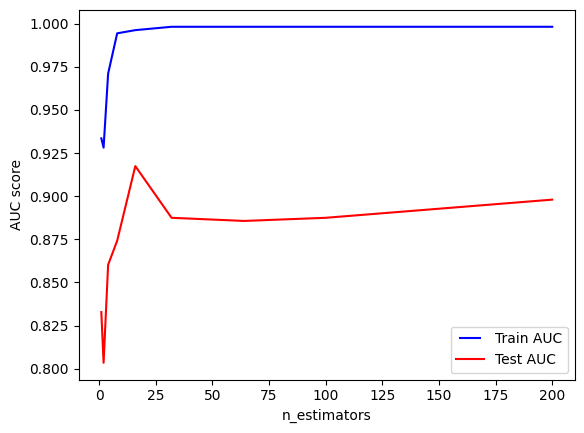

In [12]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200] 
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf. predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate) 
    test_results.append(roc_auc)


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
# Calculate the overall accuracy and confusion matrix
overall_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [15]:
print("Overall Accuracy:", overall_accuracy)
print("Confusion Matrix:\n", conf_matrix)

Overall Accuracy: 0.8977272727272727
Confusion Matrix:
 [[73  8]
 [10 85]]


In [16]:
# Class-wise User Accuracy, Producer Accuracy, and F1 Score
class_report = classification_report(y_test, y_pred, output_dict=True)
for label, metrics in class_report.items():
    if isinstance(metrics, dict):
        print(f"Class {label} - User Accuracy (Precision): {metrics['precision']:.2f}, "
              f"Producer Accuracy (Recall): {metrics['recall']:.2f}, "
              f"F1 Score: {metrics['f1-score']:.2f}")

Class 0 - User Accuracy (Precision): 0.88, Producer Accuracy (Recall): 0.90, F1 Score: 0.89
Class 1 - User Accuracy (Precision): 0.91, Producer Accuracy (Recall): 0.89, F1 Score: 0.90
Class macro avg - User Accuracy (Precision): 0.90, Producer Accuracy (Recall): 0.90, F1 Score: 0.90
Class weighted avg - User Accuracy (Precision): 0.90, Producer Accuracy (Recall): 0.90, F1 Score: 0.90


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

data = pd.read_csv('C:/Users/sheik/Downloads/HIV_dataset.csv')
df = data.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtypes == 'object' else col)

# Separate features and target
X = df.drop('Result', axis=1)
y = df['Result']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Save the resampled dataset
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Result'] = y_resampled
resampled_df.to_csv('HIV_dataset_resampled.csv', index=False)

print("SMOTE applied successfully! Balanced dataset saved as 'HIV_dataset_resampled.csv'.")


SMOTE applied successfully! Balanced dataset saved as 'HIV_dataset_resampled.csv'.
